In [ ]:
#Training a lightweight image classification model for recognizing recyclable items.
import os

# load the dataset
data_folder_path = '/content/drive/MyDrive/images'

# List the contents of the data folder
if os.path.exists(data_folder_path):
    print(f"Contents of '{data_folder_path}':")
    for item in os.listdir(data_folder_path):
        print(item)
else:
    print(f"Error: The specified folder '{data_folder_path}' does not exist. Please check the path.")

Contents of '/content/drive/MyDrive/images':
tea_bags
plastic_trash_bags
plastic_shopping_bags
shoes
styrofoam_food_containers
plastic_water_bottles
steel_food_cans
styrofoam_cups
plastic_straws
plastic_soda_bottles
plastic_food_containers
office_paper
plastic_cup_lids
glass_cosmetic_containers
paper_cups
glass_beverage_bottles
plastic_detergent_bottles
newspaper
glass_food_jars
magazines
disposable_plastic_cutlery
food_waste
eggshells
cardboard_packaging
clothing
cardboard_boxes
coffee_grounds
aluminum_soda_cans
aluminum_food_cans
aerosol_cans


In [ ]:
#Processes such as separating the dataset into
#train, validation, and test folders were performed using these libraries
import os
import random
import shutil

# Define the base directory for splitting the datasets
split_base_dir = '/content/dataset_splits'

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1 # Remaining percentage

# Create main split directories if they don't exist
for folder_name in ['train', 'validation', 'test']:
    folder_path = os.path.join(split_base_dir, folder_name)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created directory: {folder_path}")

print("Main split directories created successfully.")

Created directory: /content/dataset_splits/train
Created directory: /content/dataset_splits/validation
Created directory: /content/dataset_splits/test
Main split directories created successfully.


In [ ]:
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

# Get a list of all class folders (subdirectories) in the data_folder_path
class_folders = [f for f in os.listdir(data_folder_path) if os.path.isdir(os.path.join(data_folder_path, f))]

print(f"Found {len(class_folders)} class folders: {class_folders}")

for class_name in class_folders:
    class_path = os.path.join(data_folder_path, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]
    random.shuffle(images)

    num_images = len(images)
    num_train = int(train_ratio * num_images)
    num_val = int(val_ratio * num_images)
    num_test = num_images - num_train - num_val # Remaining for test

    train_images = images[:num_train]
    val_images = images[num_train : num_train + num_val]
    test_images = images[num_train + num_val :]

    splits = {
        'train': train_images,
        'validation': val_images,
        'test': test_images
    }

    for split_name, image_list in splits.items():
        destination_dir = os.path.join(split_base_dir, split_name, class_name)
        os.makedirs(destination_dir, exist_ok=True)
        print(f"Created directory: {destination_dir}")

        for image_name in image_list:
            src_path = os.path.join(class_path, image_name)
            dest_path = os.path.join(destination_dir, image_name)
            shutil.copy(src_path, dest_path)

    print(f"--- Class '{class_name}' processed: {len(train_images)} train, {len(val_images)} validation, {len(test_images)} test images copied.")

print("Dataset splitting and copying complete.")


Found 30 class folders: ['tea_bags', 'plastic_trash_bags', 'plastic_shopping_bags', 'shoes', 'styrofoam_food_containers', 'plastic_water_bottles', 'steel_food_cans', 'styrofoam_cups', 'plastic_straws', 'plastic_soda_bottles', 'plastic_food_containers', 'office_paper', 'plastic_cup_lids', 'glass_cosmetic_containers', 'paper_cups', 'glass_beverage_bottles', 'plastic_detergent_bottles', 'newspaper', 'glass_food_jars', 'magazines', 'disposable_plastic_cutlery', 'food_waste', 'eggshells', 'cardboard_packaging', 'clothing', 'cardboard_boxes', 'coffee_grounds', 'aluminum_soda_cans', 'aluminum_food_cans', 'aerosol_cans']
Created directory: /content/dataset_splits/train/tea_bags
Created directory: /content/dataset_splits/validation/tea_bags
Created directory: /content/dataset_splits/test/tea_bags
--- Class 'tea_bags' processed: 0 train, 0 validation, 0 test images copied.
Created directory: /content/dataset_splits/train/plastic_trash_bags
Created directory: /content/dataset_splits/validation/pl

In [ ]:
print(f"Inspecting the contents of a sample class folder: {os.path.join(data_folder_path, class_folders[0])}")
if class_folders:
    sample_class_path = os.path.join(data_folder_path, class_folders[0])
    if os.path.exists(sample_class_path):
        print(f"Contents of '{sample_class_path}':")
        contents = os.listdir(sample_class_path)
        if contents:
            for item in contents[:10]: # Print first 10 items to avoid flooding output
                print(item)
            if len(contents) > 10:
                print(f"...and {len(contents) - 10} more items.")
        else:
            print("The folder is empty.")
    else:
        print("Sample class folder does not exist. Please check the data_folder_path.")
else:
    print("No class folders were found in data_folder_path. Please check the path and structure.")


Inspecting the contents of a sample class folder: /content/drive/MyDrive/images/tea_bags
Contents of '/content/drive/MyDrive/images/tea_bags':
default
real_world


In [ ]:
import os
import random
import shutil

# Ensure image_extensions is defined (already in kernel state)
# image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

# Ensure split_base_dir, data_folder_path, and ratios are defined (already in kernel state)
# split_base_dir = '/content/dataset_splits'
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1

print(f"Using data_folder_path: {data_folder_path}")

# Get a list of all class folders (subdirectories) in the data_folder_path
class_folders = [f for f in os.listdir(data_folder_path) if os.path.isdir(os.path.join(data_folder_path, f))]

print(f"Found {len(class_folders)} class folders: {class_folders}")

for class_name in class_folders:
    class_path = os.path.join(data_folder_path, class_name)
    all_images_in_class = []

    # Walk through the class directory and its subdirectories to find all images
    for root, _, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                all_images_in_class.append(os.path.join(root, file)) # Store full path

    random.shuffle(all_images_in_class)

    num_images = len(all_images_in_class)

    if num_images == 0:
        print(f"--- Warning: No images found for class '{class_name}'. Skipping split for this class.")
        continue

    num_train = int(train_ratio * num_images)
    num_val = int(val_ratio * num_images)
    num_test = num_images - num_train - num_val # Remaining for test

    train_images = all_images_in_class[:num_train]
    val_images = all_images_in_class[num_train : num_train + num_val]
    test_images = all_images_in_class[num_train + num_val :]

    splits = {
        'train': train_images,
        'validation': val_images,
        'test': test_images
    }

    for split_name, image_list in splits.items():
        destination_dir = os.path.join(split_base_dir, split_name, class_name)
        os.makedirs(destination_dir, exist_ok=True)
        # print(f"Created directory: {destination_dir}") # Suppress frequent creation messages

        for image_full_path in image_list:
            src_path = image_full_path # Already full path
            image_name = os.path.basename(image_full_path) # Get just the filename
            dest_path = os.path.join(destination_dir, image_name)
            shutil.copy(src_path, dest_path)

    print(f"--- Class '{class_name}' processed: {len(train_images)} train, {len(val_images)} validation, {len(test_images)} test images copied.")

print("Dataset splitting and copying complete.")

Using data_folder_path: /content/drive/MyDrive/images
Found 30 class folders: ['tea_bags', 'plastic_trash_bags', 'plastic_shopping_bags', 'shoes', 'styrofoam_food_containers', 'plastic_water_bottles', 'steel_food_cans', 'styrofoam_cups', 'plastic_straws', 'plastic_soda_bottles', 'plastic_food_containers', 'office_paper', 'plastic_cup_lids', 'glass_cosmetic_containers', 'paper_cups', 'glass_beverage_bottles', 'plastic_detergent_bottles', 'newspaper', 'glass_food_jars', 'magazines', 'disposable_plastic_cutlery', 'food_waste', 'eggshells', 'cardboard_packaging', 'clothing', 'cardboard_boxes', 'coffee_grounds', 'aluminum_soda_cans', 'aluminum_food_cans', 'aerosol_cans']
--- Class 'tea_bags' processed: 400 train, 50 validation, 50 test images copied.
--- Class 'plastic_trash_bags' processed: 400 train, 50 validation, 50 test images copied.
--- Class 'plastic_shopping_bags' processed: 400 train, 50 validation, 50 test images copied.
--- Class 'shoes' processed: 400 train, 50 validation, 50 t

Apply necessary data preprocessing steps, such as resizing images to a uniform dimension, normalizing pixel values, and implementing data augmentation techniques to enhance the model's generalization capabilities.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
IMG_HEIGHT = 224 # Commonly used for models like MobileNetV2
IMG_WIDTH = 224
BATCH_SIZE = 32

print(f"Image dimensions: {IMG_HEIGHT}x{IMG_WIDTH}, Batch size: {BATCH_SIZE}")

# Define paths for the split datasets (assuming split_base_dir is already defined from previous steps)
# For example: split_base_dir = '/content/dataset_splits'
train_dir = os.path.join(split_base_dir, 'train')
validation_dir = os.path.join(split_base_dir, 'validation')
test_dir = os.path.join(split_base_dir, 'test')

# 3. Create an ImageDataGenerator instance for the training set with data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 4. Create separate ImageDataGenerator instances for validation and test sets (rescaling only, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("ImageDataGenerators initialized.")

# 5. Use flow_from_directory to create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Typically set to False for evaluation sets
)

print("Data generators created successfully.")

# 6. Print the class_indices attribute of the train_generator
print("\nClass indices from train_generator:")
print(train_generator.class_indices)


Image dimensions: 224x224, Batch size: 32
ImageDataGenerators initialized.
Found 7259 images belonging to 30 classes.
Found 1439 images belonging to 30 classes.
Found 1434 images belonging to 30 classes.
Data generators created successfully.

Class indices from train_generator:
{'aerosol_cans': 0, 'aluminum_food_cans': 1, 'aluminum_soda_cans': 2, 'cardboard_boxes': 3, 'cardboard_packaging': 4, 'clothing': 5, 'coffee_grounds': 6, 'disposable_plastic_cutlery': 7, 'eggshells': 8, 'food_waste': 9, 'glass_beverage_bottles': 10, 'glass_cosmetic_containers': 11, 'glass_food_jars': 12, 'magazines': 13, 'newspaper': 14, 'office_paper': 15, 'paper_cups': 16, 'plastic_cup_lids': 17, 'plastic_detergent_bottles': 18, 'plastic_food_containers': 19, 'plastic_shopping_bags': 20, 'plastic_soda_bottles': 21, 'plastic_straws': 22, 'plastic_trash_bags': 23, 'plastic_water_bottles': 24, 'shoes': 25, 'steel_food_cans': 26, 'styrofoam_cups': 27, 'styrofoam_food_containers': 28, 'tea_bags': 29}


Define a lightweight image classification model, preferably using transfer learning with a pre-trained model like MobileNetV2, suitable for edge devices. Train this model on the prepared dataset using TensorFlow/Keras, monitoring its performance on the validation set.



In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Define the input shape for the model
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

# 2. Load a pre-trained MobileNetV2 model as the base model
base_model = MobileNetV2(input_shape=IMG_SHAPE,
                         include_top=False, # Exclude the classifier head
                         weights='imagenet')

print("MobileNetV2 base model loaded.")

# 3. Freeze the layers of the base model
base_model.trainable = False
print("Base model layers frozen.")

# 4. Create the classification head
# Determine the number of classes from the train_generator
num_classes = train_generator.num_classes

inputs = Input(shape=IMG_SHAPE)
x = base_model(inputs, training=False) # Apply the base model in inference mode
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

print(f"Classification head created with {num_classes} classes.")

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

# Print model summary to verify structure
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded.
Base model layers frozen.
Classification head created with 30 classes.
Model compiled successfully.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        38,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,296,414 (8.76 MB)

 Trainable params: 38,430 (150.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#training using the fit method, passing the training and validation data generators

EPOCHS = 10 # You can adjust this number based on performance

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

print("Model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.0886 - loss: 3.4234 - val_accuracy: 0.3246 - val_loss: 2.5350
Epoch 2/10
  1/226 ━━━━━━━━━━━━━━━━━━━━ 5:09 1s/step - accuracy: 0.2812 - loss: 2.5514

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 341ms/step - accuracy: 0.2812 - loss: 2.5514 - val_accuracy: 0.3217 - val_loss: 2.5306
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.3823 - loss: 2.3702 - val_accuracy: 0.5021 - val_loss: 1.9335
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 342ms/step - accuracy: 0.4375 - loss: 1.7912 - val_accuracy: 0.5057 - val_loss: 1.9308
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.5150 - loss: 1.8646 - val_accuracy: 0.5724 - val_loss: 1.6229
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 340ms/step - accuracy: 0.4688 - loss: 1.9395 - val_accuracy: 0.5774 - val_loss: 1.6178
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.5764 - loss: 1.5755 - val_accuracy: 0.6179 - val_loss: 1.4373
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 78s 340ms/step - accuracy: 0.5938 - loss: 1.6451 - val_accuracy: 0.6158 - val_loss: 1.4328
Epoch 9/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6233 - loss: 1.4119 - val_accurac

# Task
Convert the trained TensorFlow/Keras model into a TensorFlow Lite (.tflite) format, applying optimizations for size and inference speed, making it suitable for deployment on a Raspberry Pi.

In [ ]:
import tensorflow as tf

# 1. Instantiate a TFLiteConverter object from the trained Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 2. Set the optimizations attribute to apply default optimizations (including quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 3. Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

# 4. Save the converted TensorFlow Lite model to a file
model_path = 'image_classification_model.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved to '{model_path}'")

Saved artifact at '/tmp/tmp3ic7nf0p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  132460400384464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058027792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058028176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132460400383888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058026448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132460400385808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058026832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058028944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058028560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058028368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132458058

Load and evaluate the converted .tflite model using the TensorFlow Lite interpreter. This step will involve running inference on a sample of the test dataset and comparing its performance (accuracy, inference time) to the original Keras model, simulating its behavior on a resource-constrained device.

In [ ]:
import numpy as np

# 1. Load the TensorFlow Lite model into an interpreter
interpreter = tf.lite.Interpreter(model_path=model_path)

# 2. Allocate tensors
interpreter.allocate_tensors()
print("TensorFlow Lite interpreter initialized and tensors allocated.")

# 3. Get the input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"Input details: {input_details}")
print(f"Output details: {output_details}")

# Get input and output tensor indices
input_index = input_details[0]['index']
output_index = output_details[0]['index']

# 4. Initialize variables for accuracy calculation
total_correct_predictions = 0
total_samples = 0

# 5. Iterate through the test_generator
print("Starting evaluation of TFLite model on test set...")
for i, (images_batch, labels_batch) in enumerate(test_generator):
    if i * BATCH_SIZE >= test_generator.samples:
        break # Stop if all samples have been processed

    # 6a. Prepare the input images
    # Ensure data type is float32 as expected by TFLite model
    input_data = images_batch.astype(np.float32)

    # 6b. Resize input tensor to accommodate the current batch size
    interpreter.resize_tensor_input(input_index, input_data.shape)
    interpreter.allocate_tensors()

    # 6c. Set the input tensor
    interpreter.set_tensor(input_index, input_data)

    # 6d. Invoke the TFLite interpreter
    interpreter.invoke()

    # 6e. Get the output tensor
    output_data = interpreter.get_tensor(output_index)

    # 6f. Convert true labels from one-hot encoded to class indices
    true_class_indices = np.argmax(labels_batch, axis=1)

    # 6g. Calculate predicted class indices
    predicted_class_indices = np.argmax(output_data, axis=1)

    # 6h. Update counts
    total_correct_predictions += np.sum(true_class_indices == predicted_class_indices)
    total_samples += len(true_class_indices)

    if (i + 1) % 10 == 0:
        print(f"Processed {total_samples} samples...")

# 7. Calculate and print the overall accuracy
accuracy = total_correct_predictions / total_samples
print(f"\nTFLite Model Evaluation Complete.")
print(f"Total samples evaluated: {total_samples}")
print(f"Total correct predictions: {total_correct_predictions}")
print(f"TFLite Model Accuracy on Test Set: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


TensorFlow Lite interpreter initialized and tensors allocated.
Input details: [{'name': 'serving_default_keras_tensor_154:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 172, 'shape': array([ 1, 30], dtype=int32), 'shape_signature': array([-1, 30], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Starting evaluation of TFLite model on test set...
Processed 320 samples...
Processed 640 samples...
Processed 960 samples...
Processed 1280 samples...

TF

Edge AI significantly benefits real-time applications by processing data directly on the device where it's collected, rather than sending it to a centralized cloud.
This offers several advantages.

First, it drastically reduces latency, as data doesn't need to travel back and forth to the cloud, enabling immediate responses crucial for applications like autonomous vehicles, robotics, or industrial automation.

Second, it enhances privacy and security by keeping sensitive data localized on the device, minimizing exposure during transmission.

Third, it improves reliability by allowing systems to operate even with intermittent or no internet connectivity.

Finally, it optimizes bandwidth usage and cost by reducing the amount of data transmitted, which is especially beneficial in remote areas or large-scale deployments.

These factors collectively make Edge AI ideal for applications requiring quick decisions, secure data handling, and robust operation in diverse environments.

# Task 2: AI-Driven IoT Concept

Scenario: Design a smart agriculture simulation system using AI and IoT.

**List sensors needed (e.g., soil moisture, temperature)**

Soil Condition Sensors
These sensors provide insights into the health and composition of the soil, directly impacting plant growth:

* Soil Moisture Sensor: Measures the volumetric water content in the soil, helping to determine irrigation needs and prevent over/under-watering.
* Soil pH Sensor: Measures the acidity or alkalinity of the soil, which is crucial for nutrient availability and plant health. Different crops thrive in specific pH ranges.
* Electrical Conductivity (EC) Sensor: Measures the total soluble salts in the soil, indicating nutrient levels and potential salinity issues that can affect plant growth.
* Nutrient Sensors (N, P, K): Specifically measure the concentrations of key macronutrients like Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil, allowing for precise fertilizer application.
* Soil Temperature Sensor: Measures the temperature of the soil, which affects seed germination, root development, and microbial activity.




### Proposed AI Model for Crop Yield Prediction

**1. Type of AI Model:**

For crop yield prediction, especially when incorporating time-series data (like daily weather, sensor readings over growth cycles) and various static features, a **Recurrent Neural Network (RNN) or a Long Short-Term Memory (LSTM) network** is highly suitable. These models excel at identifying patterns and dependencies in sequential data. Alternatively, a **Random Forest Regressor** could be used for its robustness, ability to handle non-linear relationships, and feature importance insights, especially if the time-series aspect is aggregated or handled through feature engineering.

Given the complexity and potential for time-dependent factors, an **LSTM-based model** is proposed for its ability to learn long-term dependencies in time-series data, which is crucial for agricultural processes over a growing season.

**2. Key Input Features:**

The AI model would utilize a combination of static and time-series features:

*   **Environmental Sensor Data (Time-series - e.g., daily or weekly averages/totals):**
    *   Soil Moisture (%), pH, Nitrogen (ppm), Phosphorus (ppm), Potassium (ppm)
    *   Air Temperature (°C), Humidity (%), Light Intensity (lux)
    *   Rainfall (mm)
    *   Normalized Difference Vegetation Index (NDVI) (from drone/satellite imagery, providing plant health over time)

*   **Weather Data (Historical and Forecasted - Time-series):**
    *   Daily/Weekly Average Temperature (°C), Max Temperature (°C), Min Temperature (°C)
    *   Daily/Weekly Precipitation (mm)
    *   Solar Radiation (MJ/m²)
    *   Wind Speed (m/s)

*   **Agronomic Data (Static and Time-series):**
    *   Crop Variety/Hybrid
    *   Planting Date
    *   Harvest Date (if available for historical data)
    *   Fertilizer Application Rates (N, P, K, etc. - g/m² or kg/ha)
    *   Irrigation Schedules/Amounts (L/m² or mm)
    *   Pesticide/Herbicide Application (types, dates)
    *   Previous Crop Yield (for historical context)
    *   Soil Type (e.g., Clay, Loam, Sand)
    *   Field Size (hectares or acres)

**3. Expected Output:**

The expected output of the AI model will be the **predicted crop yield** for a specific crop in a given area (e.g., a specific field or region). The unit of measurement for the predicted yield would typically be:

*   **Tons per Hectare (t/ha)**
*   **Bushels per Acre (bu/acre)**
*   **Kilograms per Square Meter (kg/m²)**

This output will allow farmers and agricultural planners to make informed decisions regarding resource allocation, harvest planning, and overall farm management.

## Outline Data Flow Diagram

Describe the data flow within the smart agriculture system, from sensor data collection, through data transmission, storage, AI processing, and finally to actionable insights or control mechanisms.

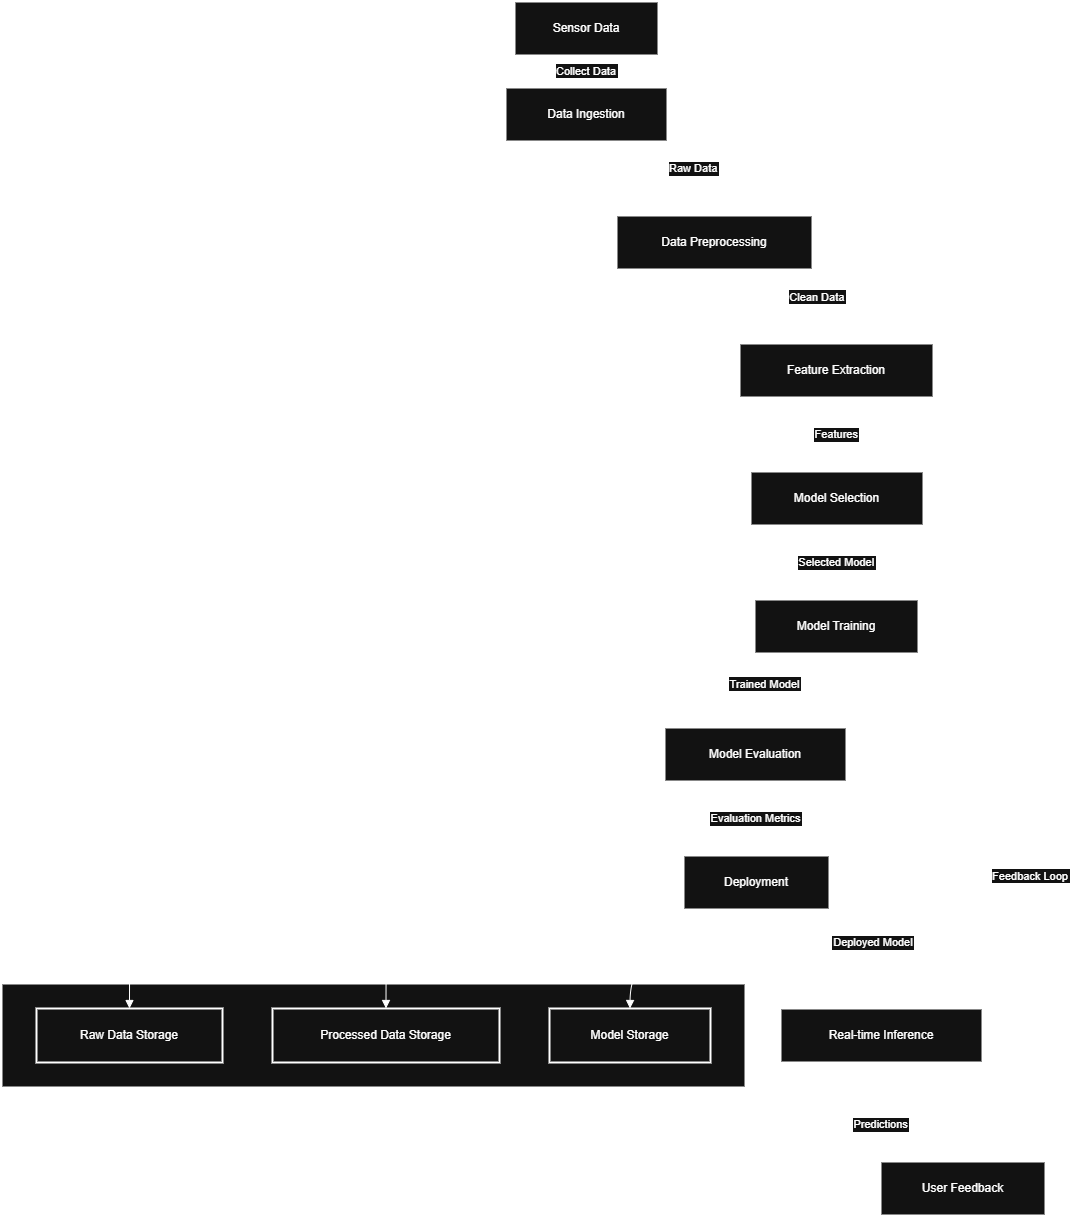